# Predicting Time for Ball Counting Game Using Machine Learning[XGBOOST REGRESSOR]

## Import Required Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

In [110]:
df = pd.read_csv("C:/Users/nithy/Downloads/Time_Data_All_P1_to_P10.csv")
df['Person'] = df['Person'].astype('category')
df.head()

,Person,Time_2,Time_3,Time_4,Time_5
0,P1,16.62,19.71,21.68,28.19
1,P1,15.06,17.90,27.11,35.31
2,P1,17.23,20.51,29.36,36.71
3,P1,14.37,16.60,24.14,34.91
4,P1,15.05,19.08,23.28,27.12


In [112]:
df.tail()

,Person,Time_2,Time_3,Time_4,Time_5
195,P10,16.81,23.72,27.05,34.31
196,P10,16.68,19.61,23.89,26.90
197,P10,14.90,20.33,25.58,31.03
198,P10,15.41,19.26,24.15,24.40
199,P10,21.93,26.43,33.20,39.98


In [114]:
df.describe()

,Time_2,Time_3,Time_4,Time_5
count,200.000000,200.000000,200.000000,200.000000
mean,17.449050,22.351550,27.875750,33.849050
std,2.652536,3.184059,3.666845,4.189166
min,10.750000,15.830000,18.780000,23.290000
25%,15.552500,19.967500,25.290000,30.657500
50%,17.445000,22.285000,27.610000,33.865000
75%,18.922500,24.235000,30.485000,36.640000
max,24.720000,31.690000,38.510000,45.910000


## Data Preprocessing

In [117]:
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
Person    0
Time_2    0
Time_3    0
Time_4    0
Time_5    0
dtype: int64

Data Types:
Person    category
Time_2     float64
Time_3     float64
Time_4     float64
Time_5     float64
dtype: object


## Exploratory Data Analysis (EDA)

### Line Plot - Average time by person

C:\Users\nithy\AppData\Local\Temp\ipykernel_22280\2386762089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby("Person").mean(numeric_only=True)


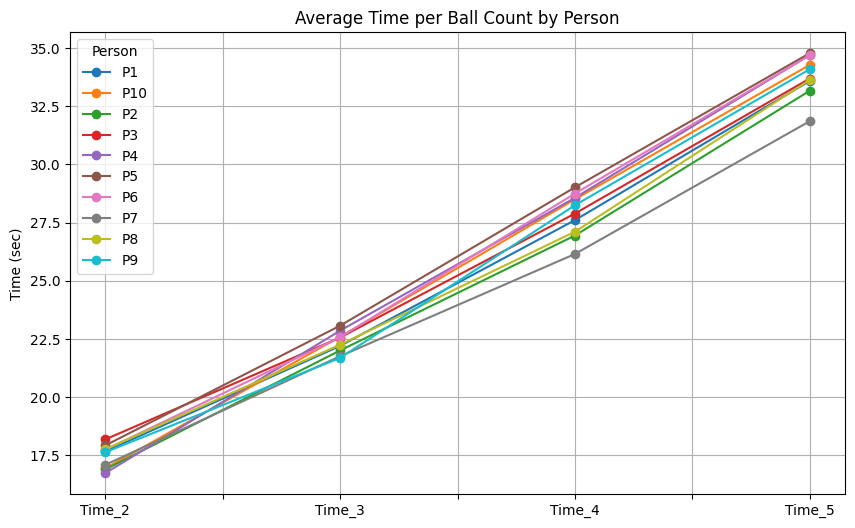

In [121]:
df_grouped = df.groupby("Person").mean(numeric_only=True)
df_grouped.T.plot(marker='o', figsize=(10, 6), title="Average Time per Ball Count by Person")
plt.ylabel("Time (sec)")
plt.grid()
plt.show()

### Boxplot

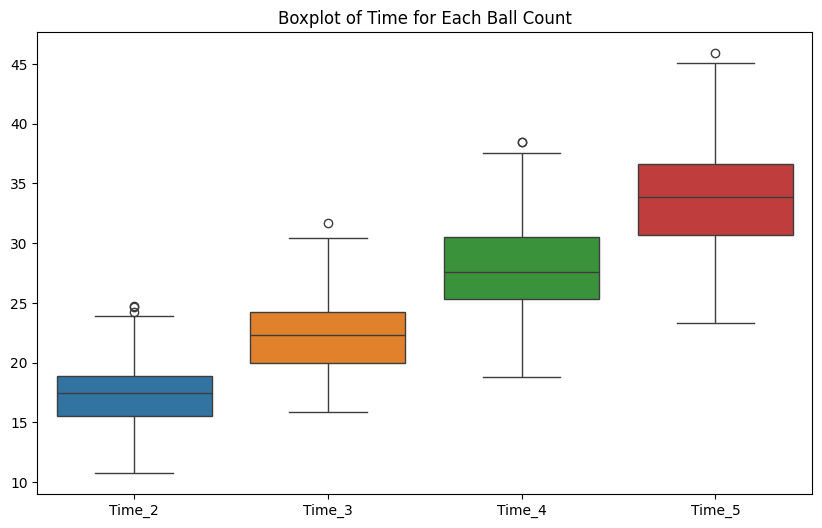

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["Person"]))
plt.title("Boxplot of Time for Each Ball Count")
plt.show()

### KDE Plot

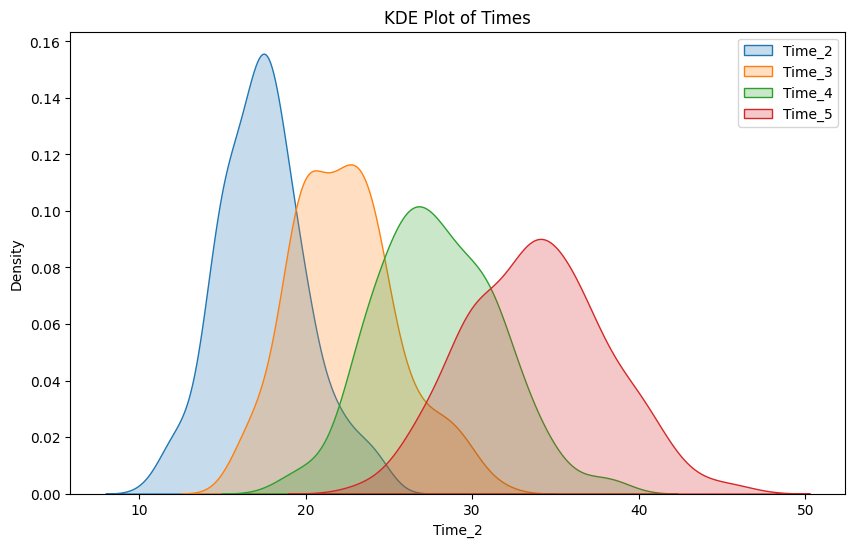

In [127]:
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    sns.kdeplot(df[col], label=col, fill=True)
plt.title("KDE Plot of Times")
plt.legend()
plt.show()

### Pairplot

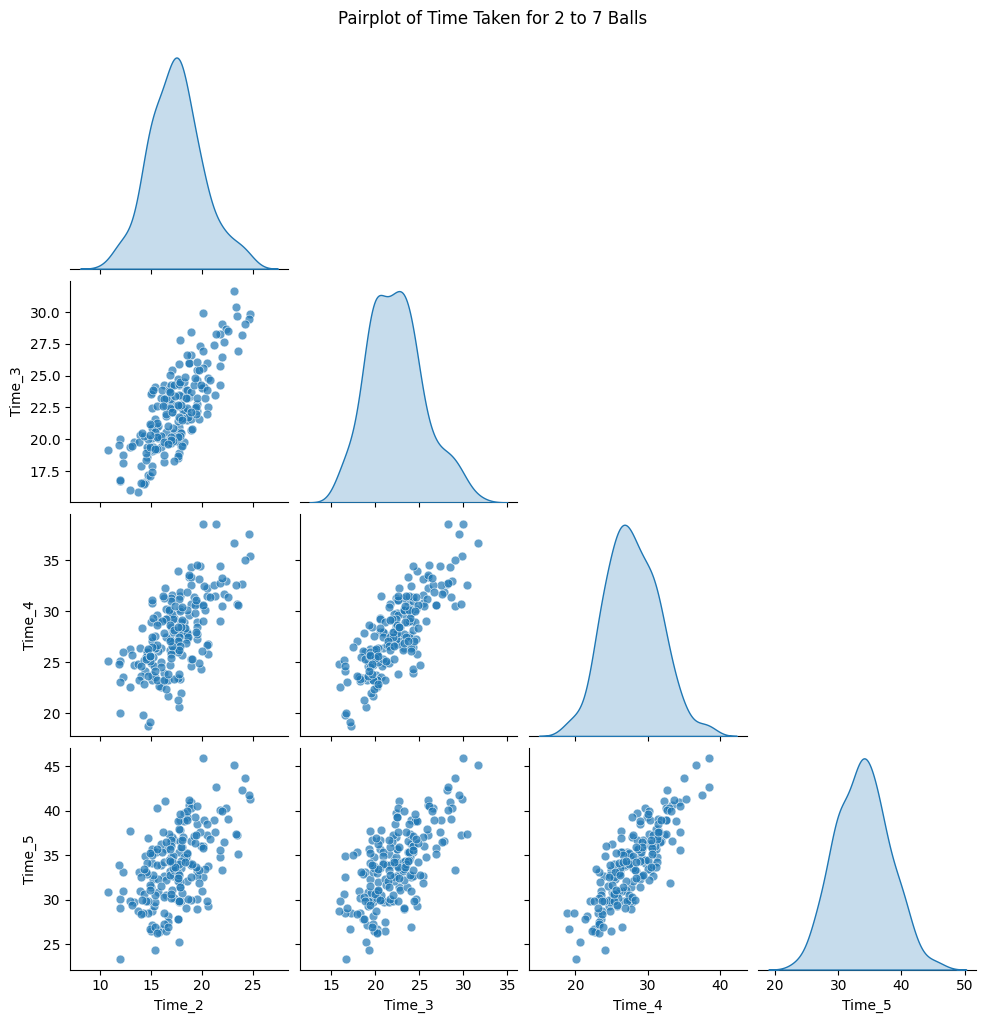

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df.drop(columns=['Person']), 
    kind='scatter', 
    diag_kind='kde', 
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40}
)

plt.suptitle("Pairplot of Time Taken for 2 to 7 Balls", y=1.02)
plt.show()

### Violin Plot

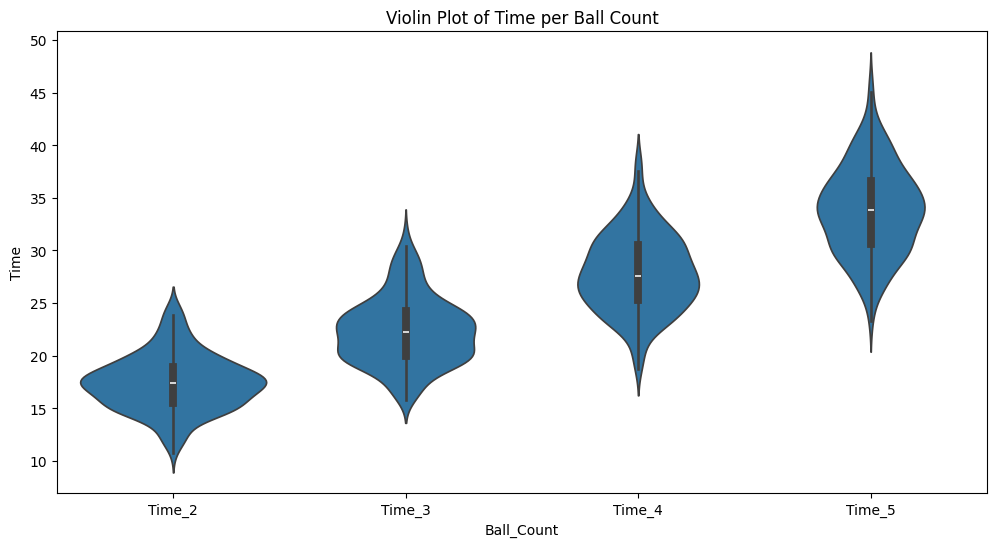

In [133]:
melted_df = df.melt(id_vars="Person", var_name="Ball_Count", value_name="Time")
plt.figure(figsize=(12, 6))
sns.violinplot(x="Ball_Count", y="Time", data=melted_df)
plt.title("Violin Plot of Time per Ball Count")
plt.show()

### Correlation Heatmap

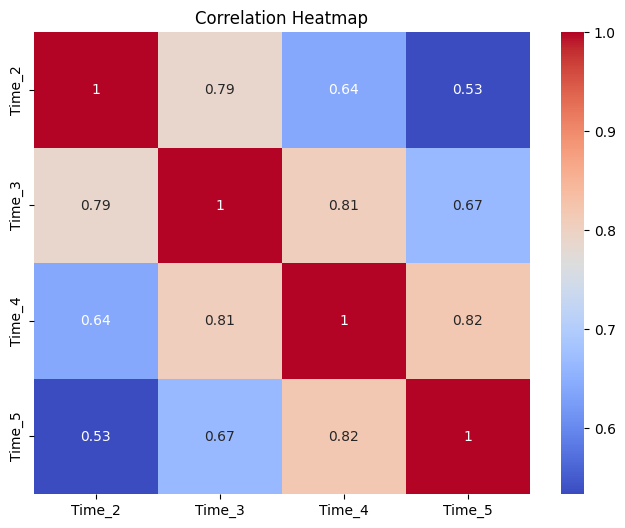

In [136]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns="Person").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Train/Test Split

In [139]:
X = df[["Time_2", "Time_3", "Time_4"]]
y = df["Time_5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling¶

In [142]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features (X)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y to 2D before scaling
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Scale target (y)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

## Train a Regression Model

In [149]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define and train the model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled_xgb = xgb_model.predict(X_test_scaled)

# Inverse transform predictions to original scale
y_pred_xgb = scaler_y.inverse_transform(y_pred_scaled_xgb.reshape(-1, 1)).ravel()

# Evaluate model
def evaluate(true, pred):
    print("MAE :", mean_absolute_error(true, pred))
    print("MSE :", mean_squared_error(true, pred))
    print("RMSE:", np.sqrt(mean_squared_error(true, pred)))
    print("R²  :", r2_score(true, pred))

print("Evaluation for XGBoost Regressor:")
evaluate(y_test, y_pred_xgb)

Evaluation for XGBoost Regressor:
MAE : 1.8433310642242424
MSE : 5.807344163980903
RMSE: 2.4098431824458832
R²  : 0.6045653894498371


## Residual plot

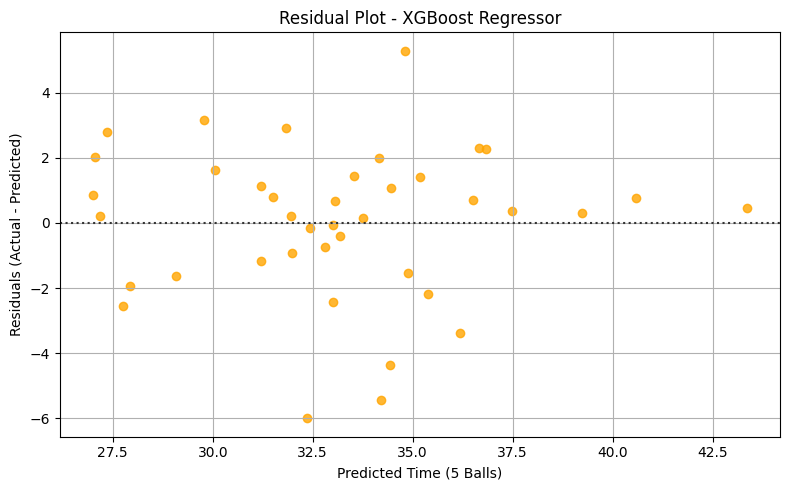

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals_xgb = y_test - y_pred_xgb

# Plot residuals
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred_xgb, y=residuals_xgb, color="orange", line_kws={"color": "red"})
plt.xlabel("Predicted Time (5 Balls)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - XGBoost Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()

## Predict for a New Student

In [155]:
# User Input for New Player
print("\n Welcome to the Ball Game Predictor!")
print("Please enter your time (in seconds) for solving with the following number of balls:")

time2 = float(input("Time for 2 balls: "))
time3 = float(input("Time for 3 balls: "))
time4 = float(input("Time for 4 balls: "))

# Create input array
new_input = [[time2, time3, time4]]

# Scale input if using StandardScaler
new_input_scaled = scaler_X.transform(new_input)

# Predict time for 5 balls
predicted_5_scaled = model.predict(new_input_scaled)
predicted_5 = scaler_y.inverse_transform(predicted_5_scaled.reshape(-1, 1)).ravel()[0]

# Assigning cognitive score based on predicted time
if predicted_5 < 25:
    score = "Excellent Thinking Speed!"
elif predicted_5 < 30:
    score = "Good Cognitive Performance!"
elif predicted_5 < 35:
    score = "Average Processing Time."
else:
    score = "Needs More Practice to Improve."

# Display Result
print(f"\nPredicted Time for 5 Balls: {predicted_5:.2f} seconds")
print(f"Your Intellectual Score: {score}")
print("\nThanks for playing the game! Keep learning!")


 Welcome to the Ball Game Predictor!
Please enter your time (in seconds) for solving with the following number of balls:


Time for 2 balls:  24.08
Time for 3 balls:  32.24
Time for 4 balls:  30.43



Predicted Time for 5 Balls: 33.28 seconds
Your Intellectual Score: Average Processing Time.

Thanks for playing the game! Keep learning!


C:\Users\nithy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt  

# Get actual and predicted times from user
try:
    your_actual = float(input("Enter your actual time for 5 Balls (in seconds): ").strip())
    your_predicted = float(input("Enter the predicted time for 5 Balls (in seconds): ").strip())

    # Calculate error and accuracy
    error_percent = abs(your_actual - your_predicted) / your_actual * 100
    accuracy_percent = 100 - error_percent

    # Plot bar chart
    plt.figure(figsize=(5, 5))
    plt.bar(["Actual", "Predicted"], [your_actual, your_predicted], color=["blue", "green"])
    plt.title("Your 5-Ball Time: Actual vs Predicted")
    plt.ylabel("Time (seconds)")
    plt.ylim(0, max(your_actual, your_predicted) + 5)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # Show results
    print(f"\nError Percentage     : {error_percent:.2f}%")
    print(f"Accuracy Percentage  : {accuracy_percent:.2f}%")

except ValueError:
    print("Invalid input! Please enter numeric values only.")


Enter your actual time for 5 Balls (in seconds):  36.54
